In [224]:
import pandas as pd
import matplotlib.pyplot as plt
import csv
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import RandomizedSearchCV



In [2]:
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')  # Télécharger les ressources nécessaires pour l'étiquetage grammatical


[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\awa29\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\awa29\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\awa29\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\awa29\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

# I-Collecte de données 




Dans cette étape, nous avons collecter un ensemble de données étiquetées qui contiennent à la fois des exemples de messages spam et des exemples de messages non spam à travers des applications comme : 

     -twilio
     -lemlist
     -waalaxy
     -mailchimp
     -brevo
  
  
Puis on a stocké ces données dans un fichier csv

In [225]:
import csv
import random

fichier_texte = r"C:\Users\awa29\OneDrive\Bureau\Stage NLP\message.txt"
fichier_csv = r"C:\Users\awa29\OneDrive\Bureau\Stage NLP\message.csv"

# Lire le fichier texte
with open(fichier_texte, 'r', encoding='utf-8-sig') as file:
    lines = file.readlines()


with open(fichier_csv, 'w', newline='', encoding='utf-8-sig') as file:
    writer = csv.writer(file)

    # Écrire l'en-tête du fichier CSV
    writer.writerow(["Message", "Type"])

    for line in lines:
        # Vérifier si la ligne contient un point-virgule
        if ';' in line:
            # Séparer le message et le type en utilisant un point-virgule comme séparateur
            message, typ = line.strip().split(';', maxsplit=1)

            # Écrire le message et le type dans le fichier CSV
            writer.writerow([message, typ])

print("Fichier CSV créé avec succès.")


Fichier CSV créé avec succès.


In [226]:
import pandas as pd

csv_file_path = r"C:\Users\awa29\OneDrive\Bureau\Stage NLP\message.csv"

df = pd.read_csv(csv_file_path)

df = df.sample(frac=1).reset_index(drop=True)




In [227]:
df.iloc[0:10, :]



,Message,Type
0,Obtenez des résultats instantanés avec notre p...,Spam
1,Nous sommes ravis d'annoncer notre nouveau par...,Non spam
2,Enrichissez-vous grâce à notre système de trad...,Spam
3,Bonne nouvelle {{firstname}} ! Notre boutique ...,Non spam
4,Obtenez des followers Twitter en masse {{first...,Spam
5,"Gagnez un voyage de rêve pour deux personnes, ...",Spam
6,"Salut, êtes-vous disponible ?",Spam
7,Vous avez été sélectionné(e) {{firstname}} pou...,Spam
8,Rencontrez les meilleurs experts du secteur lo...,Non spam
9,Boostez votre potentiel de rencontres avec not...,Spam


In [6]:
df["Message"]

0     Boostez votre productivité avec notre applicat...
1     Le salon {{other}} est l'endroit idéal pour ex...
2     Découvrez notre nouvelle collection de vêtemen...
3     Obtenez des milliers de followers sur les rése...
4     Vous avez été sélectionné(e) {{firstname}} pou...
                            ...                        
88    Répondez à ce sondage et gagnez un voyage grat...
89    Enrichissez-vous grâce à notre système de trad...
90    À la recherche de nouvelles opportunités profe...
91    Bienvenue{{firstname}}. Pour quelle entreprise...
92    Offre de bienvenue : Bénéficiez de {{other}}% ...
Name: Message, Length: 93, dtype: object

In [228]:
message_value = df.loc[75, "Message"]
print(message_value)


Boostez votre site web avec notre service de référencement, {{firstName}}. Obtenez un meilleur classement sur les moteurs de recherche et attirez plus de trafic qualifié. Contactez-nous dès aujourd'hui !


# II-Analyse Descriptive

In [229]:
summary_stats = df.describe()
summary_stats


,Message,Type
count,93,93
unique,93,2
top,Obtenez des résultats instantanés avec notre p...,Non spam
freq,1,50


In [9]:
type_email_counts = df['Type'].value_counts()
total_emails = len(df['Type'])
pourcentages = (type_email_counts / total_emails) * 100

print(pourcentages)
print(type_email_counts)

Non spam    53.763441
Spam        46.236559
Name: Type, dtype: float64
Non spam    50
Spam        43
Name: Type, dtype: int64


Text(0.5, 1.0, "Distribution des types d'e-mail")

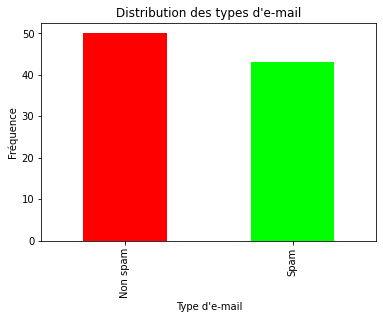

In [232]:
couleurs = ['#FF0000', '#00FF00'] 

type_email_counts.plot(kind='bar', color=couleurs)
plt.xlabel("Type d'e-mail")
plt.ylabel("Fréquence")
plt.title("Distribution des types d'e-mail")



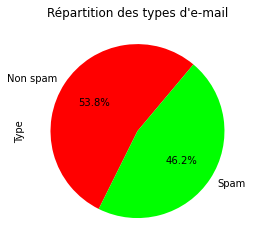

In [237]:
type_email_counts.plot(kind='pie', colors=couleurs, autopct='%1.1f%%', startangle=50)
plt.title("Répartition des types d'e-mail")
plt.show()



On a une équilibre entre les exemples de spam et de non spam dans notre ensemble de données pour éviter tout biais dans l'apprentissage du modèle.

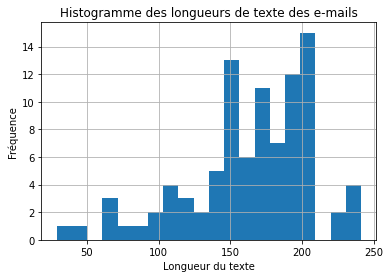

In [238]:
# Calculer les longueurs des textes d'e-mails
df["Longueur du texte"] = df["Message"].apply(lambda x: len(x))

# Créer l'histogramme
df["Longueur du texte"].hist(bins=20)
plt.xlabel("Longueur du texte")
plt.ylabel("Fréquence")
plt.title("Histogramme des longueurs de texte des e-mails")
plt.show()


In [12]:
#!pip install textblob

In [239]:
from textblob import TextBlob



In [240]:
# Créer une nouvelle colonne pour la polarité et la subjectivité
df['Polarité'] = 0.0
df['Subjectivité'] = 0.0

# Appliquer l'analyse de sentiment à chaque texte d'e-mail
for i, row in df.iterrows():
    text = row['Message']
    blob = TextBlob(text)
    polarité = blob.sentiment.polarity
    subjectivité = blob.sentiment.subjectivity
    df.at[i, 'Polarité'] = polarité
    df.at[i, 'Subjectivité'] = subjectivité

print(df[['Message', 'Polarité', 'Subjectivité']])


                                              Message  Polarité  Subjectivité
0   Obtenez des résultats instantanés avec notre p...   0.00000      0.000000
1   Nous sommes ravis d'annoncer notre nouveau par...  -0.28125      0.531250
2   Enrichissez-vous grâce à notre système de trad...   0.00000      0.000000
3   Bonne nouvelle {{firstname}} ! Notre boutique ...  -0.15625      0.375000
4   Obtenez des followers Twitter en masse {{first...   0.00000      0.000000
..                                                ...       ...           ...
88  URGENT : Gagnez de l'argent rapidement et faci...   0.00000      0.000000
89  Soldes spéciales sur les produits électronique...  -0.34375      0.583333
90  Ne vous inquiétez pas, je ne partagerai vos ré...   0.00000      0.000000
91  Obtenez des milliers de followers et likes sur...   0.00000      0.666667
92  Nous effectuerons une maintenance de notre sit...   0.00000      0.000000

[93 rows x 3 columns]


 Polarité » : La colonne « Polarité » représente la polarité du sentiment associé à chaque e-mail. La polarité est généralement mesurée sur une échelle continue, allant de -1 à 1. Une valeur proche de -1 indique un sentiment négatif, une valeur proche de 1 indique un sentiment positif, et une valeur proche de 0 indique un sentiment neutre.
« Subjectivité » : La colonne « Subjectivité » représente le degré de subjectivité du contenu de chaque e-mail. La subjectivité est également mesurée sur une échelle continue, allant de 0 à 1. Une valeur proche de 0 indique un contenu objectif, basé sur des faits ou des informations générales, tandis qu’une valeur proche de 1 indique un contenu subjectif, basé sur des opinions ou des émotions personnelles.

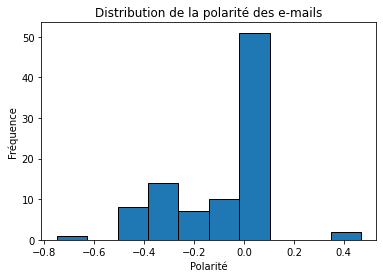

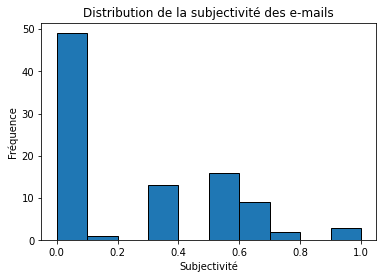

In [241]:
import matplotlib.pyplot as plt

# Créer un histogramme de la polarité des e-mails
plt.hist(df['Polarité'], bins=10, edgecolor='black')
plt.xlabel('Polarité')
plt.ylabel('Fréquence')
plt.title('Distribution de la polarité des e-mails')
plt.show()

# Créer un histogramme de la subjectivité des e-mails
plt.hist(df['Subjectivité'], bins=10, edgecolor='black')
plt.xlabel('Subjectivité')
plt.ylabel('Fréquence')
plt.title('Distribution de la subjectivité des e-mails')
plt.show()


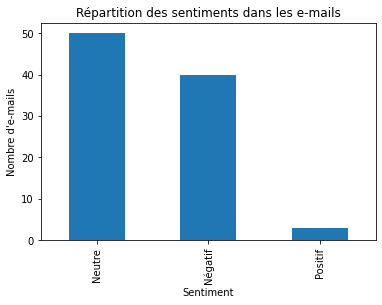

In [242]:
# Compter les occurrences de chaque sentiment
sentiment_counts = df['Polarité'].apply(lambda x: 'Positif' if x > 0 else ('Négatif' if x < 0 else 'Neutre')).value_counts()

# Créer un diagramme en barres du sentiment
sentiment_counts.plot(kind='bar')
plt.xlabel('Sentiment')
plt.ylabel('Nombre d\'e-mails')
plt.title('Répartition des sentiments dans les e-mails')
plt.show()


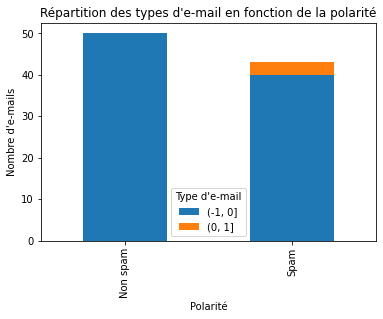

In [17]:
import matplotlib.pyplot as plt

# Créer un diagramme en barres empilées de la répartition des types d'e-mail en fonction de la polarité
stacked_bar = df.groupby(['Type', pd.cut(df['Polarité'], bins=[-1, 0, 1])]).size().unstack().plot(kind='bar', stacked=True)

# Ajouter des étiquettes et des titres
plt.xlabel('Polarité')
plt.ylabel('Nombre d\'e-mails')
plt.title('Répartition des types d\'e-mail en fonction de la polarité')
plt.legend(title='Type d\'e-mail')
plt.show()


 
# Nettoyage du Texte

Pour le nettoyage du texte, nous allons effectuer ces différentes étapes :

     -Nettoyage du texte en supprimant les caractères indésirables tels que la ponctuation, les symboles spéciaux, etc.
   
     -Normalisation du texte en convertissant les caractères en minuscules et en appliquant d'autres transformations pour       uniformiser le texte.
   
      -Suppression des mots vides (stop words) tels que "et", "mais", "ou", qui n'apportent pas beaucoup d'informations pour la   classification.
   
     -Tokenisation du texte en divisant les phrases en mots ou en tokens individuels.
     
      - Supprimer les variables personnalisées

Dans un premier temps, nous allons étiqueter notre variable cible appelée "Type".

In [256]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
df['encoded'] = encoder.fit_transform(df['Type'])
df.head()

,Message,Type,Longueur du texte,Polarité,Subjectivité,Cleaned_Content,encoded
0,Obtenez des résultats instantanés avec notre p...,Spam,196,0.00000,0.00000,obtenez resultats instantanes programme remise...,1
1,Nous sommes ravis d'annoncer notre nouveau par...,Non spam,170,-0.28125,0.53125,somme ravis dannoncer nouveau partenariat ense...,0
2,Enrichissez-vous grâce à notre système de trad...,Spam,200,0.00000,0.00000,enrichissezvous grace a systeme trading automa...,1
3,Bonne nouvelle {{firstname}} ! Notre boutique ...,Non spam,189,-0.15625,0.37500,bonne nouvelle boutique ligne propose vente fl...,0
4,Obtenez des followers Twitter en masse {{first...,Spam,161,0.00000,0.00000,obtenez follower twitter masse logiciel croiss...,1


In [21]:
lemmatizer = WordNetLemmatizer()
stop_words = list(stopwords.words('french')) #les mots à enlever
print(stop_words)

['au', 'aux', 'avec', 'ce', 'ces', 'dans', 'de', 'des', 'du', 'elle', 'en', 'et', 'eux', 'il', 'ils', 'je', 'la', 'le', 'les', 'leur', 'lui', 'ma', 'mais', 'me', 'même', 'mes', 'moi', 'mon', 'ne', 'nos', 'notre', 'nous', 'on', 'ou', 'par', 'pas', 'pour', 'qu', 'que', 'qui', 'sa', 'se', 'ses', 'son', 'sur', 'ta', 'te', 'tes', 'toi', 'ton', 'tu', 'un', 'une', 'vos', 'votre', 'vous', 'c', 'd', 'j', 'l', 'à', 'm', 'n', 's', 't', 'y', 'été', 'étée', 'étées', 'étés', 'étant', 'étante', 'étants', 'étantes', 'suis', 'es', 'est', 'sommes', 'êtes', 'sont', 'serai', 'seras', 'sera', 'serons', 'serez', 'seront', 'serais', 'serait', 'serions', 'seriez', 'seraient', 'étais', 'était', 'étions', 'étiez', 'étaient', 'fus', 'fut', 'fûmes', 'fûtes', 'furent', 'sois', 'soit', 'soyons', 'soyez', 'soient', 'fusse', 'fusses', 'fût', 'fussions', 'fussiez', 'fussent', 'ayant', 'ayante', 'ayantes', 'ayants', 'eu', 'eue', 'eues', 'eus', 'ai', 'as', 'avons', 'avez', 'ont', 'aurai', 'auras', 'aura', 'aurons', 'aur

In [243]:
import re
import unicodedata
from urllib.parse import urlparse
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from string import punctuation

def clean_text(text):
    # Convertir en minuscules
    text = text.lower()

    # Retirer les accents
    text = unicodedata.normalize('NFKD', text).encode('ASCII', 'ignore').decode('utf-8')

    # Retirer la ponctuation
    text = re.sub('[%s]' % re.escape(punctuation), '', text)

    # Remplacer les crochets par un espace
    text = re.sub('[][)(]', ' ', text)

    # Supprimer les URL
    text = [word for word in text.split() if not urlparse(word).scheme]
    text = ' '.join(text)

    # Supprimer les mots commençant par @
    text = re.sub(r'\@\w+', '', text)

    # Supprimer les balises HTML
    text = re.sub(re.compile("<.*?>"), '', text)

    # Obtenir uniquement les caractères et les chiffres
    text = re.sub('[^A-Za-z0-9]', ' ', text)

    # Lemmatisation
    lemmatizer = WordNetLemmatizer()
    text = ' '.join([lemmatizer.lemmatize(word) for word in text.split()])

     # Retirer les stop words, y compris les mots spécifiques
    stop_words = set(stopwords.words('french'))
    stop_words.update(['phone', 'lastname', 'firstname', 'civility', 'date', 'time', 'sender', 'link', 'other'])
    text = ' '.join([word for word in text.split() if word not in stop_words])

    return text




In [244]:
# Appliquer la fonction de nettoyage sur la colonne 'Message'

df['Cleaned_Content'] = df['Message'].apply(clean_text)



In [245]:
df.iloc[1:10,]

,Message,Type,Longueur du texte,Polarité,Subjectivité,Cleaned_Content
1,Nous sommes ravis d'annoncer notre nouveau par...,Non spam,170,-0.281250,0.531250,somme ravis dannoncer nouveau partenariat ense...
2,Enrichissez-vous grâce à notre système de trad...,Spam,200,0.000000,0.000000,enrichissezvous grace a systeme trading automa...
3,Bonne nouvelle {{firstname}} ! Notre boutique ...,Non spam,189,-0.156250,0.375000,bonne nouvelle boutique ligne propose vente fl...
4,Obtenez des followers Twitter en masse {{first...,Spam,161,0.000000,0.000000,obtenez follower twitter masse logiciel croiss...
5,"Gagnez un voyage de rêve pour deux personnes, ...",Spam,182,0.000000,0.000000,gagnez voyage reve deux personnes inscrivezvou...
6,"Salut, êtes-vous disponible ?",Spam,29,0.000000,0.000000,salut etesvous disponible
7,Vous avez été sélectionné(e) {{firstname}} pou...,Spam,122,0.000000,0.000000,ete selectionnee gagner iphone x reclamez prix...
8,Rencontrez les meilleurs experts du secteur lo...,Non spam,200,-0.333333,0.583333,rencontrez meilleurs expert secteur lors salon...
9,Boostez votre potentiel de rencontres avec not...,Spam,201,0.000000,0.000000,boostez potentiel rencontres application renco...


In [247]:
df['Cleaned_Content']

0     obtenez resultats instantanes programme remise...
1     somme ravis dannoncer nouveau partenariat ense...
2     enrichissezvous grace a systeme trading automa...
3     bonne nouvelle boutique ligne propose vente fl...
4     obtenez follower twitter masse logiciel croiss...
                            ...                        
88    urgent gagnez largent rapidement facilement cl...
89    soldes speciales produits electroniques jusqua...
90            inquietez pa partagerai reponses personne
91    obtenez milliers follower like reseau sociaux ...
92    effectuerons maintenance site web a pendant ce...
Name: Cleaned_Content, Length: 93, dtype: object

# Extraction de fonctionnalités 



Dans cette étape, nous allons identifier les caractéristiques pertinentes dans les messages qui peuvent aider à distinguer les spams des messages normaux. Certaines fonctionnalités couramment utilisées incluent :

La fréquence des mots : combien de fois chaque mot apparaît dans un message.
La présence de mots clés : vérifier si certains mots clés associés aux spams sont présents dans un message.
La présence de liens ou d'adresses e-mail : détecter si un message contient des liens ou des adresses e-mail souvent utilisés dans les spams.
La longueur du message : les spams ont souvent tendance à être plus courts ou plus longs que les messages normaux.

Et pour cela on va utuliser effectue la vectorisation TF-IDF des données textuelles de la colonne 'Cleaned_Content' du DataFrame df et crée un nouveau DataFrame X contenant les valeurs TF-IDF correspondantes. Cette représentation vectorielle peut être utilisée comme entrée pour l'apprentissage automatique ou d'autres tâches d'analyse de texte.

In [248]:
def apply_tfidf_vectorization(data, text_column, min_df=1):
    """
    Applique la vectorisation TF-IDF sur une colonne de texte donnée.

    Args:
        data (DataFrame): Le DataFrame contenant les données.
        text_column (str): Le nom de la colonne de texte à vectoriser.
        min_df (int, optional): La valeur de min_df pour le TfidfVectorizer. Par défaut, min_df=1.

    Returns:
        DataFrame: Le DataFrame contenant les valeurs TF-IDF.
    """
    # Créer une instance de TfidfVectorizer
    vectorizer = TfidfVectorizer(min_df=min_df)

    # Appliquer la vectorisation TF-IDF sur la colonne de texte donnée
    X_vec = vectorizer.fit_transform(data[text_column])

    # Convertir la matrice creuse en un tableau numpy
    X_array = X_vec.toarray()

    # Créer un DataFrame avec les valeurs TF-IDF
    X = pd.DataFrame(X_array, columns=vectorizer.get_feature_names_out())

    return X


In [249]:
X = apply_tfidf_vectorization(df, "Cleaned_Content")


In [250]:
X

,10,14h,24,50,5000,abonnement,abonnes,abouti,achat,achetant,...,visibilite,visitant,visons,vite,voir,voulais,voyage,web,webinar,youtube
0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.00000,0.0,0.0
1,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.316315,0.0,0.0,0.0,0.0,0.00000,0.0,0.0
2,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.00000,0.0,0.0
3,0.0,0.0,0.296984,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.00000,0.0,0.0
4,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.00000,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.00000,0.0,0.0
89,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.414487,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.00000,0.0,0.0
90,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.00000,0.0,0.0
91,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.00000,0.0,0.0


# Construction du modèle

Dans cette partie on va tester plusieurs modeles de classification

In [31]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


In [257]:
y = df["encoded"]

In [33]:
X

,10,14h,24,50,5000,abonnement,abonnes,abouti,achat,achetant,...,visibilite,visitant,visons,vite,voir,voulais,voyage,web,webinar,youtube
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.320228,0.0,0.0,0.0
89,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
90,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
91,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0


In [258]:
y

0     1
1     0
2     1
3     0
4     1
     ..
88    1
89    0
90    1
91    1
92    0
Name: encoded, Length: 93, dtype: int32

In [285]:
def train_and_evaluate_model(X, y, model):
    """
    Divise les données en ensembles d'entraînement et de test, entraîne un modèle donné et renvoie les mesures de performances.

    Args:
        X (array-like): Les données d'entraînement.
        y (array-like): Les étiquettes d'entraînement.
        model: Le modèle à entraîner et évaluer.

    Returns:
        dict: Un dictionnaire contenant les mesures de performances (accuracy, precision, recall, f1-score).
    """
    # Diviser les données en ensembles d'entraînement et de test
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, stratify=y)

    # Entraîner le modèle
    model.fit(X_train, y_train)

    # Prédire les étiquettes pour les données de test
    y_pred = model.predict(X_test)

    # Calculer les mesures de performances
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    # Retourner les mesures de performances dans un dictionnaire
    performance_measures = {
        "accuracy": accuracy,
        "precision": precision,
        "recall": recall,
        "f1-score": f1
    }

    return performance_measures


In [286]:
model_log = LogisticRegression()
train_and_evaluate_model(X,y,model_log)

{'accuracy': 0.75,
 'precision': 1.0,
 'recall': 0.46153846153846156,
 'f1-score': 0.631578947368421}

In [308]:
model_nb_ber = MultinomialNB()
train_and_evaluate_model(X,y,model_nb_ber)

{'accuracy': 0.8928571428571429,
 'precision': 0.9166666666666666,
 'recall': 0.8461538461538461,
 'f1-score': 0.8799999999999999}

In [309]:
model_rf = RandomForestClassifier()
train_and_evaluate_model(X,y,model_rf)

{'accuracy': 0.8571428571428571,
 'precision': 0.9090909090909091,
 'recall': 0.7692307692307693,
 'f1-score': 0.8333333333333333}

In [316]:
model_svm = SVC()
train_and_evaluate_model(X,y,model_svm)

{'accuracy': 0.75,
 'precision': 0.875,
 'recall': 0.5384615384615384,
 'f1-score': 0.6666666666666667}

In [319]:
model_knn = KNeighborsClassifier()
train_and_evaluate_model(X,y,model_knn)

{'accuracy': 0.8928571428571429,
 'precision': 1.0,
 'recall': 0.7692307692307693,
 'f1-score': 0.8695652173913044}

## Avec les Hyperparamètres 

In [99]:
from sklearn.model_selection import GridSearchCV

In [320]:
params_nb = {'alpha': [0.1, 0.5, 1.0]}
params_logistic = {'C': [0.1, 1.0, 10.0]}
params_knn = {'n_neighbors': [3, 5, 7]}
params_svm = {'C': [0.1, 1.0, 10.0], 'kernel': ['linear', 'rbf']}
params_random = {'n_estimators': [100, 200, 300]}


In [321]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def train_and_evaluate_model_grid(X, y, model,param_grid):
    """
    Divise les données en ensembles d'entraînement et de test, effectue une recherche de grille pour trouver les meilleurs
    hyperparamètres du modèle, entraîne le modèle avec les meilleurs hyperparamètres et renvoie les mesures de performances.

    Args:
        X (array-like): Les données d'entraînement.
        y (array-like): Les étiquettes d'entraînement.
        model: Le modèle à entraîner et évaluer.
        param_grid (dict): Le dictionnaire des hyperparamètres à tester dans la recherche de grille.

    Returns:
        dict: Un dictionnaire contenant les mesures de performances (accuracy, precision, recall, f1-score) du modèle
        avec les meilleurs hyperparamètres.
    """
    # Diviser les données en ensembles d'entraînement et de test
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, stratify=y)

    # Effectuer une recherche de grille pour trouver les meilleurs hyperparamètres
    grid_search = GridSearchCV(model, param_grid, cv=5)
    grid_search.fit(X_train, y_train)

    # Obtenir le modèle avec les meilleurs hyperparamètres
    best_model = grid_search.best_estimator_

    # Prédire les étiquettes pour les données de test avec le modèle sélectionné
    y_pred = best_model.predict(X_test)

    # Calculer les mesures de performances
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    # Retourner les mesures de performances dans un dictionnaire
    performance_measures = {
        "accuracy": accuracy,
        "precision": precision,
        "recall": recall,
        "f1-score": f1
    }

    return performance_measures,best_model


In [323]:
train_and_evaluate_model_grid(X,y,model_nb_ber,params_nb )

({'accuracy': 0.8928571428571429,
  'precision': 1.0,
  'recall': 0.7692307692307693,
  'f1-score': 0.8695652173913044},
 MultinomialNB(alpha=0.5))

In [324]:
train_and_evaluate_model_grid(X,y,model_log,params_logistic)


({'accuracy': 0.8214285714285714,
  'precision': 0.8333333333333334,
  'recall': 0.7692307692307693,
  'f1-score': 0.8},
 LogisticRegression(C=10.0))

In [325]:
train_and_evaluate_model_grid(X,y,model_svm,params_svm )

({'accuracy': 0.75,
  'precision': 0.875,
  'recall': 0.5384615384615384,
  'f1-score': 0.6666666666666667},
 SVC(kernel='linear'))

In [327]:
train_and_evaluate_model_grid(X,y,model_knn,params_knn)


({'accuracy': 0.75,
  'precision': 0.8,
  'recall': 0.6153846153846154,
  'f1-score': 0.6956521739130435},
 KNeighborsClassifier(n_neighbors=7))

In [328]:
train_and_evaluate_model_grid(X,y,model_rf,params_random)


({'accuracy': 0.75,
  'precision': 0.875,
  'recall': 0.5384615384615384,
  'f1-score': 0.6666666666666667},
 RandomForestClassifier(n_estimators=200))

['C:\\Users\\awa29\\OneDrive\\Bureau\\Stage NLP\\modele.joblib']

Notre meilleur modele est le ** d'apres les résultats

In [329]:
df1=pd.read_csv(r"C:\Users\awa29\OneDrive\Bureau\Stage NLP\spam.csv" , encoding = "ISO-8859-1")


In [330]:
df1=df1.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'],axis= 'columns')


In [331]:
df1

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [332]:
df1.columns=['Type','Message']

In [333]:
df1.describe()

,Type,Message
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [334]:
df1['encoded'] = encoder.fit_transform(df1['Type'])
df1

,Type,Message,encoded
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0
...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,1
5568,ham,Will Ì_ b going to esplanade fr home?,0
5569,ham,"Pity, * was in mood for that. So...any other s...",0
5570,ham,The guy did some bitching but I acted like i'd...,0


In [335]:
#!pip install googletrans==4.0.0-rc1


In [336]:
from googletrans import Translator

translator = Translator()



In [337]:
df1

,Type,Message,encoded
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0
...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,1
5568,ham,Will Ì_ b going to esplanade fr home?,0
5569,ham,"Pity, * was in mood for that. So...any other s...",0
5570,ham,The guy did some bitching but I acted like i'd...,0


In [338]:
nb_spam = df['Type'].value_counts()['Spam']
nb_non_spam = df['Type'].value_counts()['Non spam']

# Calculer le nombre de lignes souhaité pour chaque classe dans les nouvelles données pour atteindre une répartition équilibrée
nombre_lignes_par_classe = min(nb_spam, nb_non_spam)  # Nombre égal de lignes pour chaque classe

# Sélectionner un sous-ensemble aléatoire des nouvelles données pour chaque classe avec le nombre de lignes souhaité
nouvelles_donnees_spam = df1[df1['Type'] == 'spam'].sample(nombre_lignes_par_classe, replace=True)
nouvelles_donnees_non_spam = df1[df1['Type'] == 'ham'].sample(nombre_lignes_par_classe, replace=True)

# Concaténer les données existantes et les nouvelles données équilibrées
donnees = pd.concat([df[['Type', 'Message', 'encoded']], nouvelles_donnees_spam, nouvelles_donnees_non_spam])

# Réorganiser l'index des lignes
donnees.reset_index(drop=True, inplace=True)

# Afficher les premières lignes du jeu de données équilibré
donnees

,Type,Message,encoded
0,Spam,Obtenez des résultats instantanés avec notre p...,1
1,Non spam,Nous sommes ravis d'annoncer notre nouveau par...,0
2,Spam,Enrichissez-vous grâce à notre système de trad...,1
3,Non spam,Bonne nouvelle {{firstname}} ! Notre boutique ...,0
4,Spam,Obtenez des followers Twitter en masse {{first...,1
...,...,...,...
174,ham,Captain is in our room:),0
175,ham,No we sell it all so we'll have tons if coins....,0
176,ham,Oh shut it. Omg yesterday I had a dream that I...,0
177,ham,"Yeah, don't go to bed, I'll be back before mid...",0


In [339]:
donnees['Message'] = donnees['Message'].apply(lambda x: translator.translate(x, dest='fr').text)


In [340]:
donnees

,Type,Message,encoded
0,Spam,Obtenez des résultats instantanés avec notre p...,1
1,Non spam,Nous sommes ravis d'annoncer notre nouveau par...,0
2,Spam,Enrichissez-vous grâce à notre système de trad...,1
3,Non spam,Bonne nouvelle {{firstname}} ! Notre boutique ...,0
4,Spam,Obtenez des followers Twitter en masse {{first...,1
...,...,...,...
174,ham,Le capitaine est dans notre chambre :),0
175,ham,"Non, nous vendons tout, donc nous aurons des t...",0
176,ham,"Oh ferme.Hier, j'ai rêvé que j'avais 2 enfants...",0
177,ham,"Ouais, ne va pas te coucher, je reviendrai ava...",0


In [482]:
donnees["encoded"].value_counts(normalize=True)


0    0.519553
1    0.480447
Name: encoded, dtype: float64

In [341]:
donnees['Cleaned_Content'] = donnees['Message'].apply(clean_text)


In [343]:
X=apply_tfidf_vectorization(donnees,"Cleaned_Content")

In [344]:
y=donnees["encoded"]

In [386]:
train_and_evaluate_model_grid(X,y,model_nb_ber,params_nb)

({'accuracy': 0.8703703703703703,
  'precision': 0.9130434782608695,
  'recall': 0.8076923076923077,
  'f1-score': 0.8571428571428572},
 MultinomialNB(alpha=0.5))

In [361]:
train_and_evaluate_model_grid(X,y,model_log,params_logistic)


({'accuracy': 0.7592592592592593,
  'precision': 0.782608695652174,
  'recall': 0.6923076923076923,
  'f1-score': 0.7346938775510203},
 LogisticRegression(C=10.0))

In [362]:
train_and_evaluate_model_grid(X,y,model_svm,params_svm )

({'accuracy': 0.7592592592592593,
  'precision': 0.8823529411764706,
  'recall': 0.5769230769230769,
  'f1-score': 0.6976744186046512},
 SVC(kernel='linear'))

In [363]:
train_and_evaluate_model_grid(X,y,model_knn,params_knn)


({'accuracy': 0.7592592592592593,
  'precision': 0.7096774193548387,
  'recall': 0.8461538461538461,
  'f1-score': 0.7719298245614036},
 KNeighborsClassifier())

In [364]:
train_and_evaluate_model_grid(X,y,model_rf,params_random)


({'accuracy': 0.6666666666666666,
  'precision': 0.8333333333333334,
  'recall': 0.38461538461538464,
  'f1-score': 0.5263157894736842},
 RandomForestClassifier(n_estimators=300))

#  Model Final

In [440]:
X.columns

Index(['000', '061104', '0709983605', '07808247860', '0800', '08000839402',
       '08000938767', '08002986906', '0808', '0825',
       ...
       'www4tcbiz', 'wwwcomuknet', 'wwwdbuknet', 'wwwrtfsphostingcom', 'xx',
       'xxx', 'youtube', 'yr', 'yup', 'zogtoriusjai'],
      dtype='object', length=1232)

In [408]:
y

0      1
1      0
2      1
3      0
4      1
      ..
174    0
175    0
176    0
177    0
178    0
Name: encoded, Length: 179, dtype: int32

In [421]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, stratify=y)

params_nb = {'alpha': [0.1, 0.5, 1.0]}
model= MultinomialNB()

grid_search = GridSearchCV(model, params_nb, cv=10)
grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_
print(best_model)



MultinomialNB(alpha=0.1)


['C:\\Users\\awa29\\OneDrive\\Bureau\\Stage NLP\\modele.joblib']

In [443]:
# Sauvegarder le modèle dans un fichier
dump(best_model, r"C:\Users\awa29\OneDrive\Bureau\Stage NLP\modele.joblib")

['C:\\Users\\awa29\\OneDrive\\Bureau\\Stage NLP\\modele.joblib']

In [422]:
# Calculer les mesures de performances
y_pred = best_model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Calculate precision
precision = precision_score(y_test, y_pred)
print("Precision:", precision)

# Calculate recall
recall = recall_score(y_test, y_pred)
print("Recall:", recall)

# Calculate F1-score
f1 = f1_score(y_test, y_pred)
print("F1-Score:", f1)




Accuracy: 0.8888888888888888
Precision: 0.9333333333333333
Recall: 0.8235294117647058
F1-Score: 0.8749999999999999


              precision    recall  f1-score   support

           0       0.86      0.95      0.90        19
           1       0.93      0.82      0.87        17

    accuracy                           0.89        36
   macro avg       0.90      0.89      0.89        36
weighted avg       0.89      0.89      0.89        36



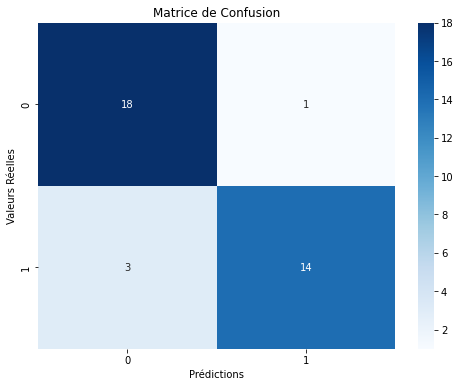

In [423]:
print(classification_report(y_test, y_pred))

confusion_mat = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mat, annot=True, cmap="Blues", fmt="d")
plt.title("Matrice de Confusion")
plt.xlabel("Prédictions")
plt.ylabel("Valeurs Réelles")
plt.show()

In [44]:
#!pip install pika


In [387]:
from joblib import load
import pika


In [466]:
model= load(r"C:\Users\awa29\OneDrive\Bureau\Stage NLP\modele.joblib")

vectorizer = TfidfVectorizer(min_df=1)

# Appliquer la vectorisation TF-IDF sur la colonne de texte donnée
vectorizer.fit_transform(donnees["Cleaned_Content"])

def test(text):
    cleaned_text = clean_text(text)
    vectorized_text = vectorizer.transform([cleaned_text])
    result = best_model.predict(vectorized_text)
    return result




In [476]:
text1= "Salut {{firstname}}, Je suppose que vous êtes trop occupé pour regarder cela en ce moment? "
text2 = "Obtenez maintenant des produits de santé gratuits ! Réclamez votre récompense en cliquant sur le lien ci-dessous : http://example.com"
text3="Enrichissez-vous grâce à notre système de trading automatique, {{civility}} {{firstName}} {{lastName}}. Pas besoin d'expérience préalable, laissez notre logiciel générer des revenus passifs pour vous."

In [477]:
test(text1)


array([0])

In [478]:
test(text2)


array([1])

In [479]:
test(text2)


array([1])

Array[0] qui signifie que le text est considéré  **Non Spam**

Array[1] qui signifie que le text est considéré  **Spam**


In [ ]:
def process_message(channel, method, properties, body):
    message = body.decode('utf-8')

    # Récupérer le statut du message depuis les propriétés
   # status = properties.headers.get('statut')

    # Récupérer l'IDE depuis les propriétés
    ide = properties.headers.get('IDE')

    # Effectuer la prédiction avec le modèle
    result = test(message)

    # Prendre des mesures en fonction du résultat
    if result==1:
        # Message identifié comme un spam
        print("Message identifié comme un spam :", message,ide)
        
    else:
        # Message non-spam
        print("Message non-spam :", message,ide )

    # Indiquer à RabbitMQ que le message a été traité
    channel.basic_ack(delivery_tag=method.delivery_tag)

# Établir la connexion avec RabbitMQ
credentials = pika.PlainCredentials('guest', 'guest')
parameters = pika.ConnectionParameters('127.0.0.1',
                                   5672,
                                   '/',
                                   credentials)
connection = pika.BlockingConnection(parameters)

channel = connection.channel()

# Déclarer la file d'attente à consommer
channel.queue_declare(queue='tech.message.queuesanalyses', durable=True)

# Définir la fonction de rappel pour le traitement des messages
channel.basic_consume(queue='tech.message.queuesanalyses', on_message_callback=process_message)

# Démarrer la consommation des messages
channel.start_consuming()


C:\Users\awa29\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MultinomialNB was fitted with feature names
  warnings.warn(


Message identifié comme un spam : Bonjour,
Confirmez votre adresse email en cliquant sur le lien suivant :je confirme mon email.Le lien expire dans 1 heure

 None
Message identifié comme un spam : Bonjour,
Confirmez votre adresse email en cliquant sur le lien suivant :je confirme mon email.Le lien expire dans 1 heure

 None


In [ ]:
#!pip install flask


In [58]:
from flask import Flask, request, jsonify
